<a href="https://colab.research.google.com/github/marcusRB/uoc-ub-bioinformatics-programming-language/blob/master/03_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programación para la Bioinformática

Unidad 3: Librerías científicas en Python - Matplotlib - Ejercicios
------------------------------------------------------

## Etiquetas

Bienvenidos a la PEC de la unidad 3. Bajo estas lineas encontrareis ejercicios y preguntas cada uno de ellos tendrá una etiqueta que indica los recursos necesarios para resolverlos. Hay tres posibles etiquetas:



* **<font color="green" size="+2">MU</font>** **Materiales unidad**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura.

* **<font color="blue" size="+2">EG</font>** **Consulta externa guiada**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de como encontrar la información adicional necesaria.

* **<font color="gold" size="+2">CI</font>** **Consulta externa independiente**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, y el enunciado no incluye las indicaciones de como encontrar la información adicional. El estudiante deberá buscar esta información independientemente.

## Tests

Antes de nada, decir que en el ámbito de la programación es muy común utilizar tests (llamados tests unitarios) durante la codificación de los programas. Los tests sirven para saber si un programa se comporta como se espera. Es decir, sirven para validar la funcionalidad del programa, no para determinar la calidad del código.

Así pues, los tests son un gran aliado del programador. Es por eso que la mayoría de los ejercicios e incluso alguna de las preguntas tendran una celda bajo ellas con un comentario en la primera línea con el título: `# Test Ejercicio X` o `Test Pregunta X`

**IMPORTANTE**: **no debéis modificar las celdas de test**.

Si las ejecutáis, lo que CoLab hará será ejecutar el test correspondiente sobre vuestro código. Dependiendo del resultado, sabréis que:

* Si el test falla, entonces vuestro código no funciona como se espera. Así pues, tendréis que corregirlo.

* Si el test no falla, entonces vuestro código se comporta como se espera. Sin embargo, esto no significa que el el ejercicio sea correcto, ya que hay situaciones en las que se pide usar una determinada función o estructura. Por ejemplo, imaginad que se pide resolver un ejercicio usando un ``for`` y, en su lugar, usáis un ``while``. Pues seguramente vuestro programa pasaría el test (porque funciona como se espera), pero no respeta un requisito del enunciado.

**Para poder ejecutar los tests primero debéis ejecutar la siguiente celda de código**: (Tan solo una vez por sesión)

In [17]:
!pip install ipytest
import ipytest
ipytest.autoconfig()

###**Ejercicios de entrenamiento**

In [33]:
plt.rcdefaults()
plt.style.use('default')

### **Ejercicio 1**


Haced un gráfico en el que se vea la progresión del rmsd a lo largo del tiempo, de los pasos de una dinámica molecular. Los valores de RMSD y los pasos de tiempo se encuentran en el fichero msd_uoc.dat. La primera columna corresponde a los pasos de tiempo, la segunda al backbone de la proteina, la tercera al substrato y la cuarta al centro activo.

El gráfico tiene que tener definido:

* Titulo en el eje x e y (con un tamaño de la letra de 14)
* Leyenda
* Cambiáis los colores predeterminados para cada columna dibujada

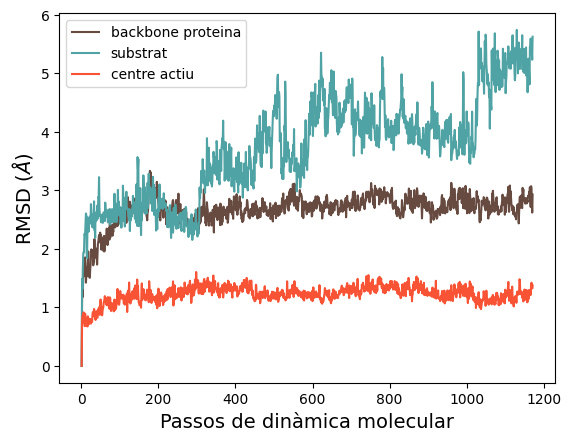

In [18]:
# Ejecutad primero esta celda para obtener el fichero
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/rmsd_uoc.dat --no-check-certificate

File ‘rmsd_uoc.dat’ already there; not retrieving.



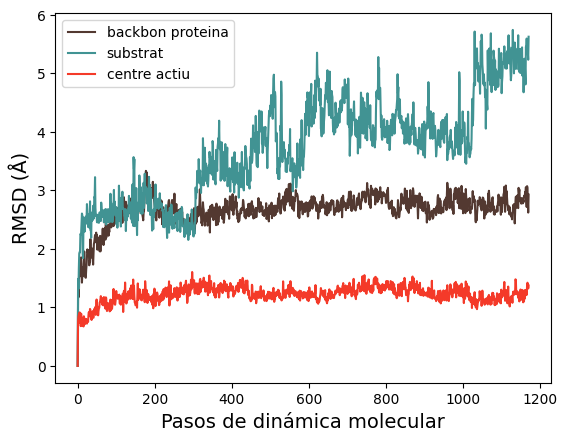

In [21]:
# para poder visualizar el grafico en este notebook
%matplotlib inline

# importamos los módulos necesarios
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#RESPUESTA

# We create a path of the content file
rmsd_path = '/content/rmsd_uoc.dat'

# Transform the main array by the method genfromtxt
rmsd_array = np.genfromtxt(rmsd_path, usecols=(1,2,3))

# Set the colors in rgb using the conversion by hexa
colors = [(83/255, 57/255, 49/255),
            (65/255,147/255,147/255),
             (244/255, 58/255, 41/255)]

# Fix the parameters of prop_cycle with default colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# Plot using the 3 nested arrays
plt.plot(rmsd_array[:,:3])

# Set the xlabel and ylabel + legend
plt.xlabel('Pasos de dinámica molecular', fontsize=14)
plt.ylabel('RMSD (Å)', fontsize=14)
plt.legend(['backbon proteina', 'substrat', 'centre actiu'])
plt.show()

### **Ejercicio 2**

Haced un gráfico en que se vea el rmsd del backbone de la proteína y el del centro activo en forma de histograma a lo largo de la trayectoria. El gráfico tiene que cumplir las siguientes condiciones:

* Tenéis que tener dos subplots por cada sistema.
* Los dos subplots tienen que compartir el mismo eje de las y
* Lo primero plot tiene que tener transparencia y tiene que ser de color verde rellenado
* El segundo plot solo tiene que tener la línea del histograma de color rojol

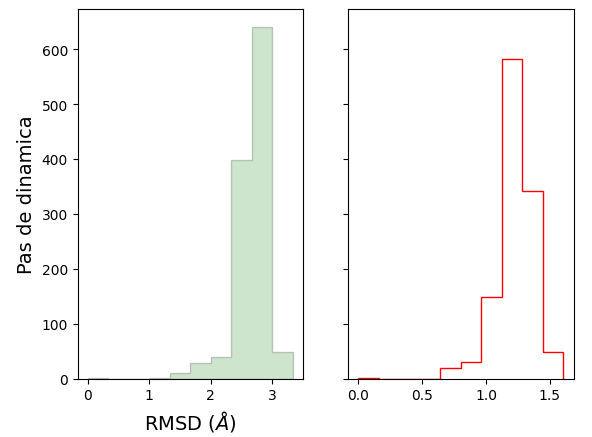


In [ ]:
# para poder visualizar el grafico en este notebook
%matplotlib inline

#RESPUESTA

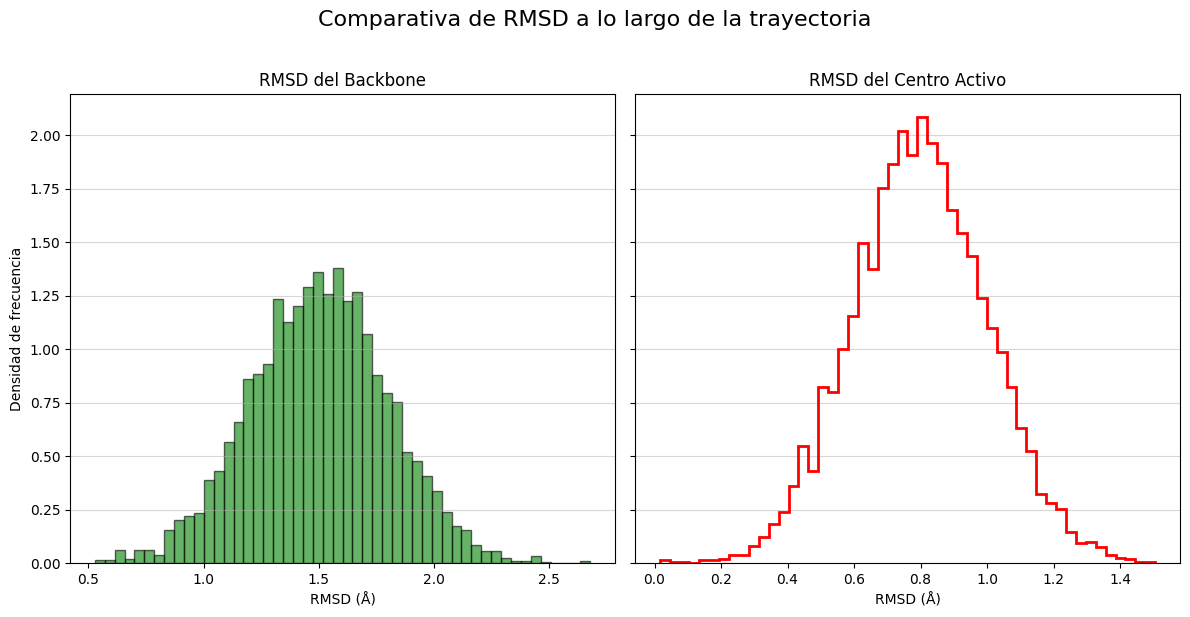

In [ ]:
np.random.seed(42) # Para reproducibilidad

# Simulación de 5000 frames de datos RMSD en Angstroms (Å)
trayectoria_backbone = np.random.normal(loc=1.5, scale=0.3, size=5000)
trayectoria_centro_activo = np.random.normal(loc=0.8, scale=0.2, size=5000)

# Aseguramos que los valores sean positivos
trayectoria_backbone[trayectoria_backbone < 0] = 0.1
trayectoria_centro_activo[trayectoria_centro_activo < 0] = 0.05

# -----------------------------------

# --- Creación de los subplots ---

# Creamos una figura y dos ejes (ax1, ax2), organizados en 1 fila y 2 columnas.
# sharey=True asegura que ambos subplots compartan el mismo eje Y.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# ------------------------------------------------------------------
# Subplot 1 (ax1): Histograma del Backbone (Verde rellenado, transparente)
# ------------------------------------------------------------------

ax1.hist(trayectoria_backbone,
         bins=50,             # Número de barras del histograma
         color='green',       # Color de relleno
         alpha=0.6,           # Transparencia (alpha < 1)
         edgecolor='black',   # Color del borde de las barras
         density=True)        # Normaliza las alturas para representar la densidad de probabilidad

ax1.set_title('RMSD del Backbone')
ax1.set_xlabel('RMSD (Å)')
ax1.set_ylabel('Densidad de frecuencia') # Etiqueta compartida del eje Y
ax1.grid(axis='y', alpha=0.5)


# ------------------------------------------------------------------
# Subplot 2 (ax2): Histograma del Centro Activo (Línea roja sin relleno)
# ------------------------------------------------------------------

ax2.hist(trayectoria_centro_activo,
         bins=50,             # Mismo número de barras para consistencia
         color='red',         # Color de la línea (y del relleno por defecto si no se especifica)
         histtype='step',     # Dibuja solo el contorno del histograma (línea)
         density=True,        # Normaliza las alturas
         linewidth=2)         # Grosor de la línea

ax2.set_title('RMSD del Centro Activo')
ax2.set_xlabel('RMSD (Å)')
# ax2.set_ylabel('Densidad de frecuencia') # No es necesario, comparte el eje Y con ax1
ax2.grid(axis='y', alpha=0.5)


# --- Ajustes finales de la figura ---

# Asegura que el eje Y tenga suficiente espacio para ambos gráficos, ya que es compartido.
# En este caso, ambos ejes Y tendrán el mismo rango de 0 a ~1.8 (dependiendo de la densidad).
fig.suptitle('Comparativa de RMSD a lo largo de la trayectoria', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### **Ejercicio 3**



Existen una gran variedad de base de datos para todos los tipos de sistemas biológicos en que estemos interesados. Una de ellas es la base de datos llamada **CAZy** (http://www.cazy.org/), en que podemos encontrar descritas todas las familias de módulos catalíticos y de unión de carbohidratos relacionados estructuralmente (o dominios funcionales) de enzimas que degradan, modifican o crean enlaces glicosídicos, denominados **CAZymes**.

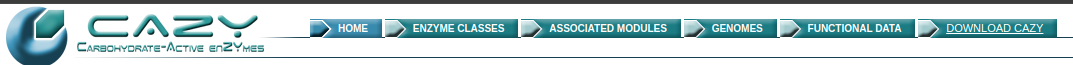

Aparte de consultar directamente la proteína en la que estemos interesados, podemos analizar este conjunto de datos descargándolas desde la página web. En este fichero podemos encontrar varías columnas con información diversa.

* **Primera columna**: Nombre de la clase de CAZyme, seguido con número de la familia a la cual pertenece
* **Segunda columna**: tipo de organismo donde se ha encontrado (Eukariota, bacteria...)
* **Tercera columna**: Organizme exacto donde se ha encontrado
* **Siguientes columnas**: Número de clasificación y en qué bases de datos se pueden encontrar.

Descargaréis un archivo denominado **cazy_fecha_*Aspergillus.txt* en que por motivos de medida, se ha dejado solo la información por los organismos Aspergillus.

In [ ]:
# Ejecutad primero esta celda pàra descargar el fichero
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/cazy_data_Aspergillus.txt --no-check-certificate

File ‘cazy_data_Aspergillus.txt’ already there; not retrieving.



En este ejercicio tendremos que crear dos funciones en que las suyas características tienen que ser las siguientes:
* **es_digit()**: Creáis una función en que la variable de entrada se puede corresponder a un texto en que hay letras y números y tiene que devolver solo las letras en una sola variable en formato de string.
* **clasifica_classes_CAZymes()**: Creáis una función en que la variable de entrada sea un fichero de texto descargado de la base de datos CAZy y que clasifique en un diccionario, las clases de CAZymes que hay en aquel fichero y sus valores se corresponden a la cantidad existente por cada clase.

Finalmente, feudo un gráfico de diagrama de sectores (o pie chart en ángulos) en que se vean los porcentajes para cada clase, tal y como se ve en la siguiente figura.


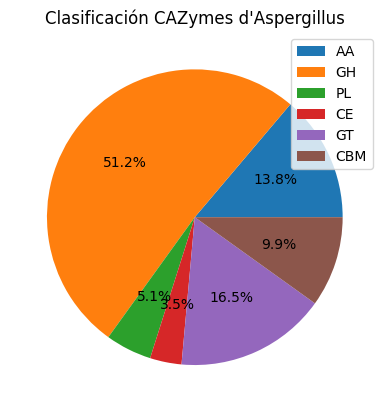

In [ ]:
# para poder visualizar el gráàfico en este notebook
%matplotlib inline

# importamos los módulos necessarios
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def es_digit(data):
  # Función que encuentra si un valor de un string es un digito o no, y solamente develve
  # los valores correspondientes a las letras
  #RESPUESTA


def clasifica_classes_CAZymes(data):
  # Función en que creamos un diccionario en que las keys sueño el tipo de clases
  # que pueden llegar a existir por los CAZymes y los valores se corresponde a la
  # cantidad existente de estas clases.
  CAZymes = {}
  with open(data, "r") as infile:
    for line in infile:
      #respuesta



IndentationError: expected an indented block after function definition on line 9 (ipython-input-1346487298.py, line 15)

Clasificación de clases CAZymes para el archivo /content/cazy_data_Aspergillus.txt:
{'AA_': 4632, 'GH_': 10108, 'PL_': 2184, 'PL': 208, 'GH': 14144, 'AA': 1909, 'CE': 1633, 'GT': 7825, 'CBM': 4686}


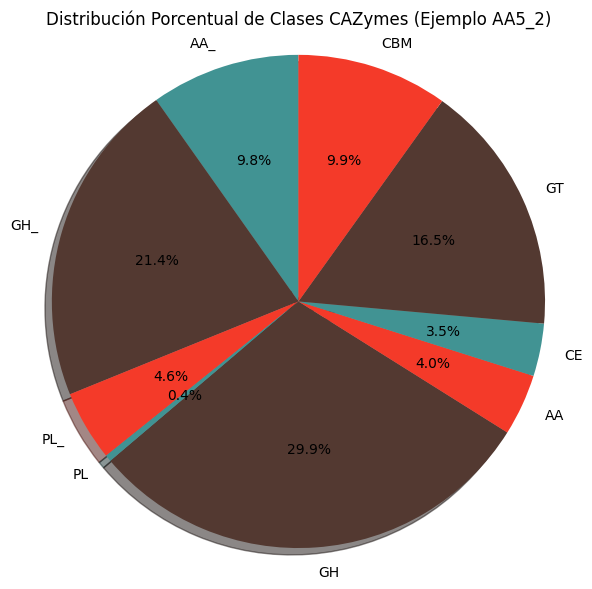

In [ ]:
def es_digit(data):
    """
    Función que encuentra si un valor de un string es un digito o no,
    y solamente devuelve los valores correspondientes a las letras.
    """
    letras = [caracter for caracter in data if not caracter.isdigit()]
    return "".join(letras)

def clasifica_classes_CAZymes(data_filename):
    """
    Función que crea un diccionario donde las keys son el tipo de clases
    (AA5_2, etc.) de los CAZymes y los valores se corresponden a la
    cantidad existente de estas clases en el fichero.

    Adaptada para leer la primera columna del nuevo formato de archivo.
    """
    CAZymes = {}
    with open(data_filename, "r") as infile:
        for line in infile:
            # Ignorar líneas vacías o incompletas si las hubiera
            if not line.strip():
                continue

            # Dividir la línea por espacios/tabulaciones y tomar la primera parte
            parts = line.strip().split()[0]
            clase = es_digit(parts) # La primera parte ya es la clase (e.g., 'AA5_2')

            # Contar las ocurrencias
            if clase:
                if clase in CAZymes:
                    CAZymes[clase] += 1
                else:
                    CAZymes[clase] = 1
        return CAZymes

# ======================================================
# EJECUCIÓN DEL CÓDIGO Y GENERACIÓN DEL GRÁFICO
# ======================================================
cazy_data_path = "/content/cazy_data_Aspergillus.txt"
conteo_clases = clasifica_classes_CAZymes(cazy_data_path)
print(f"Clasificación de clases CAZymes para el archivo {cazy_data_path}:")
print(conteo_clases)

# --- 3. Generar el gráfico de sectores (Pie Chart) ---

# Preparamos los datos para Matplotlib
labels = list(conteo_clases.keys())
sizes = list(conteo_clases.values())

fig1, ax1 = plt.subplots(figsize=(7, 7))

ax1.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',   # Muestra el porcentaje
        shadow=True,
        startangle=90)

ax1.axis('equal') # Asegura que el círculo sea un círculo perfecto

plt.title('Distribución Porcentual de Clases CAZymes (Ejemplo AA5_2)')
plt.show()

###**Ejercicios entregables**

**IMPORTANTE:** Recordad que es necesaria la línea

```python
%matplotlib inline
```
al principio de cada celdilla de código para que podáis visualizar los gráficos en este notebook.

### Ejercicio 1 **<font color="green" size="+2">MU</font>**

Representad en un único gráfico los valores de `RMSD` que obtenemos del mismo sistema durante dos réplicas (guardadas en las variables **rmsd_1** y **rmsd_2**) de dinámica molecular:

In [ ]:
# La representación debe dar una imagen como la siguiente

In [22]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

rmsd_1 = [0.0, 0.8179, 0.8722, 0.8167, 0.9986, 1.0228, 1.0871, 1.0272, 1.106, 1.214, 1.0416, 1.0352, 1.0699, 1.2043, 1.2302, 1.2311, 1.2343, 1.3265, 1.4224, 1.5417, 1.5107, 1.3624, 1.1884, 1.2587, 1.3398, 1.3975, 1.428, 1.4124, 1.5001, 1.5159, 1.4257, 1.4895, 1.4401, 1.4194, 1.4773, 1.331, 1.4052, 1.4228, 1.3882, 1.5344, 1.7261, 1.5357, 1.4964, 1.3815, 1.4766, 1.4516, 1.508, 1.4655, 1.5135, 1.3558]
rmsd_2 = [0.0, 0.8825, 0.9304, 0.9855, 1.1564, 0.8904, 0.8377, 1.1146, 1.0925, 1.0459, 1.1511, 1.1803, 1.1723, 1.0849, 1.2163, 1.2699, 1.3853, 1.3331, 1.4182, 1.3679, 1.3395, 1.3832, 1.3882, 1.2002, 1.4512, 1.3753, 1.4428, 1.4732, 1.4808, 1.5204, 1.4225, 1.4215, 1.4785, 1.4612, 1.4872, 1.4092, 1.411, 1.5148, 1.4719, 1.3599, 1.3812, 1.293, 1.3543, 1.3675, 1.3784, 1.4436, 1.6283, 1.6973, 1.61, 1.7059]

# Respuesta

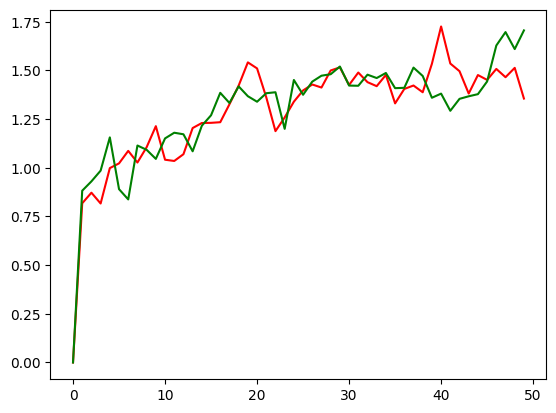

In [23]:
# We plot directy using two main colors
plt.plot(rmsd_1, color='red')
plt.plot(rmsd_2, color='green')
plt.show()

### Ejercicio 2 **<font color="blue" size="+2">EG</font>**

Representa en un gráfico 3D la función `f(x,y) = 4*cos(x) + 3*sin(y)` en el intervalo `[-2(pi/2), 2(pi/2)]` (en radianes) con un step de `0.05`

Podéis consultar ejemplos de graficos 3D aquí: https://matplotlib.org/stable/plot_types/index.html

In [ ]:
# La representación debe dar una imagen como la siguiente

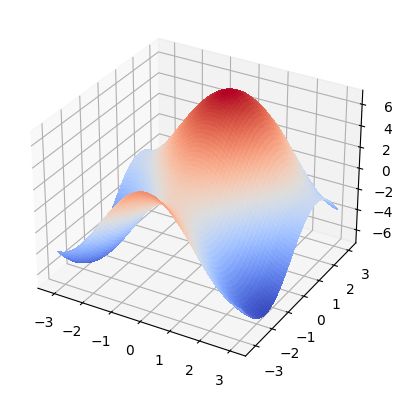

In [24]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Respuesta

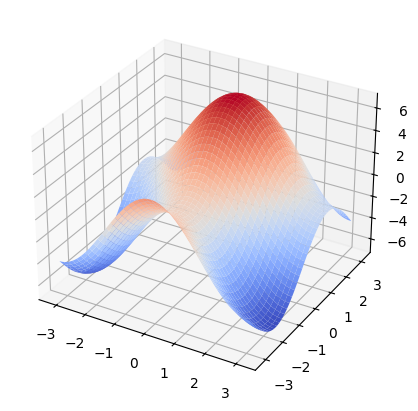

In [25]:
"""
First step is define the range and step
by pi, xmin and ymin; xmax and ymax
"""
pi = np.pi
xmin, xmax = -pi, pi
ymin, ymax = -pi, pi
step = 0.05

"""
The, we create two arrays fox x and y by np.arange
"""

x = np.arange(xmin, xmax + step, step)
y = np.arange(ymin, ymax + step, step)

"""
To achieve the same figure above, we should use
numpy meshgrid with x and y arrays
"""
# Crear la malla (grid) de coordenadas para X e Y
X, Y = np.meshgrid(x, y)

"""
Set the function as the description:
f(x,y) = 4*cos(x) + 3*sin(y)
"""
Z = 4 * np.cos(X) + 3 * np.sin(Y)

"""
Configure and show the 3D graph
adding the subplot
"""
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

"""
Finally, for the surface we set the map color coolwarm and finally
we achieve the same azimuth and elevation
"""
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')
ax.view_init(elev=30., azim=-60)
plt.show()

### Ejercicio 3 **<font color="blue" size="+2">EG</font>**
Representa la función que quieras de la forma que consideres. Sé creativo a la hora de escoger la función a representar y el intervalo de valores.

Podéis consultar https://matplotlib.org/stable/plot_types/index.html para inspiraros.

<>:8: SyntaxWarning: invalid escape sequence '\('
<>:8: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-4246418601.py:8: SyntaxWarning: invalid escape sequence '\('
  The Mandelbrot function is the recursive equation \(Z_{n+1}=Z_{n}^{2}+C\),


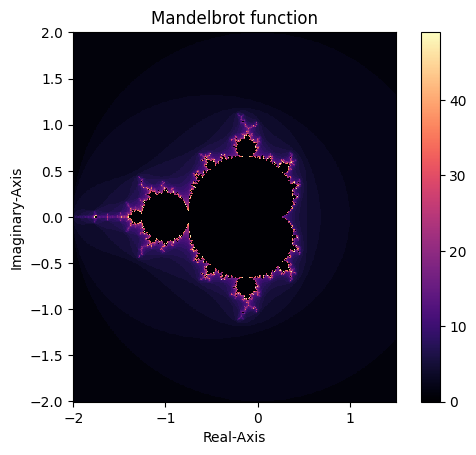

In [32]:
%matplotlib inline

"""
We create the Mandelbrot function for matplotlib
using the following function by the Wikipedia's reference here:
https://en.wikipedia.org/wiki/Mandelbrot_set

The Mandelbrot function is the recursive equation \(Z_{n+1}=Z_{n}^{2}+C\),
which is used to generate the famous Mandelbrot set by iterating it for each
complex number \(C\). The set includes all complex numbers \(C\) for which the
sequence generated by this function, starting with \(Z_{0}=0\), does not tend
to infinity. Points in the set are often colored black, while points outside
the set are colored based on how quickly they diverge

"""

# Respuesta
import pylab as plt
import numpy as np

"""
Setting parameters to apply at the main recursive function
- any positive floating point value (n)
- any positive integer value
- set to any matplotlib valid colormap
"""
xDomain, yDomain = np.linspace(-2,1.5,500), np.linspace(-2,2,500)
bound = 2
power = 2
max_iterations = 50
colormap = 'magma'

"""
Second step, we computing 2-d array to represent the mandelbrot-set
based of this reference: https://realpython.com/mandelbrot-set-python/
"""
iterationArray = []
for y in yDomain:
    row = []
    for x in xDomain:
        c = complex(x,y)
        z = 0
        for iterationNumber in range(max_iterations):
            if(abs(z) >= bound):
                row.append(iterationNumber)
                break
            else: z = z**power + c
        else:
            row.append(0)
    iterationArray.append(row)

"""
Finally, we plotting the data
"""
ax = plt.axes()
ax.set_aspect('equal')
graph = ax.pcolormesh(xDomain, yDomain, iterationArray, cmap = colormap)
plt.colorbar(graph)
plt.xlabel("Real-Axis")
plt.ylabel("Imaginary-Axis")
plt.title('Mandelbrot function')
plt.show()

### Ejercicio 4 **<font color="green" size="+2">MU</font>**

Dados los siguientes datos procedentes de una dinámica molecular de una proteína, representad en uno o varios gráficos los valores máximos, mínimos y medios de la distancia entre un átomo del sustrato y diferentes aminoácidos de la proteína. Representad también, el r.m.s.f correspondiente para cada aminoácido.

_El root mean square fluctuation (r.m.s.f.) es una medida numérica que mide la flexibilidad individual de diferentes partículas a lo largo de una trayectoria de dinámica molecular. Esta medida normalmente nos sirve para encontrar qué aminoácidos son los que más contribuyen en el movimiento de la proteína._

Las posiciones del vector **datos_dinamica** son las siguientes:

* Número aminoácido
* Valor máximo distancia entre sustrato y aminoácido (Å)
* Valor mínimo distancia entre sustrato y aminoácido (Å)
* Valor medio distancia entre sustrato y aminoácido (Å)
* Valor r.m.s.f. (Å)

In [ ]:
# La representación ha de retornar gráficos similares a los siguientes:

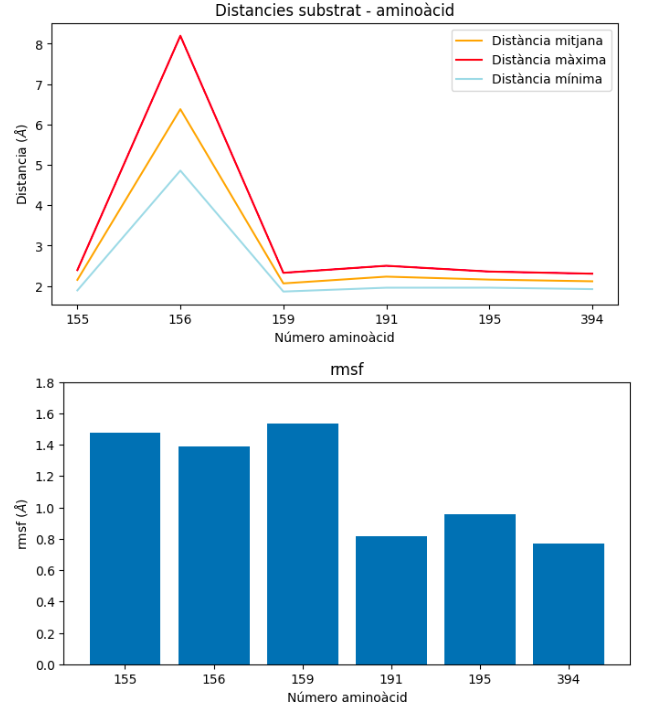

In [34]:
from matplotlib import figure
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

datos_dinamica = [["155", 2.394, 1.892, 2.152, 1.478],
                  ["156", 8.198, 4.859, 6.380, 1.389],
                  ["159", 2.327, 1.863, 2.065, 1.535],
                  ["191", 2.501, 1.958, 2.232, 0.815],
                  ["195", 2.358, 1.959, 2.159, 0.959],
                  ["394", 2.305, 1.923, 2.117, 0.768]]

# Respuesta

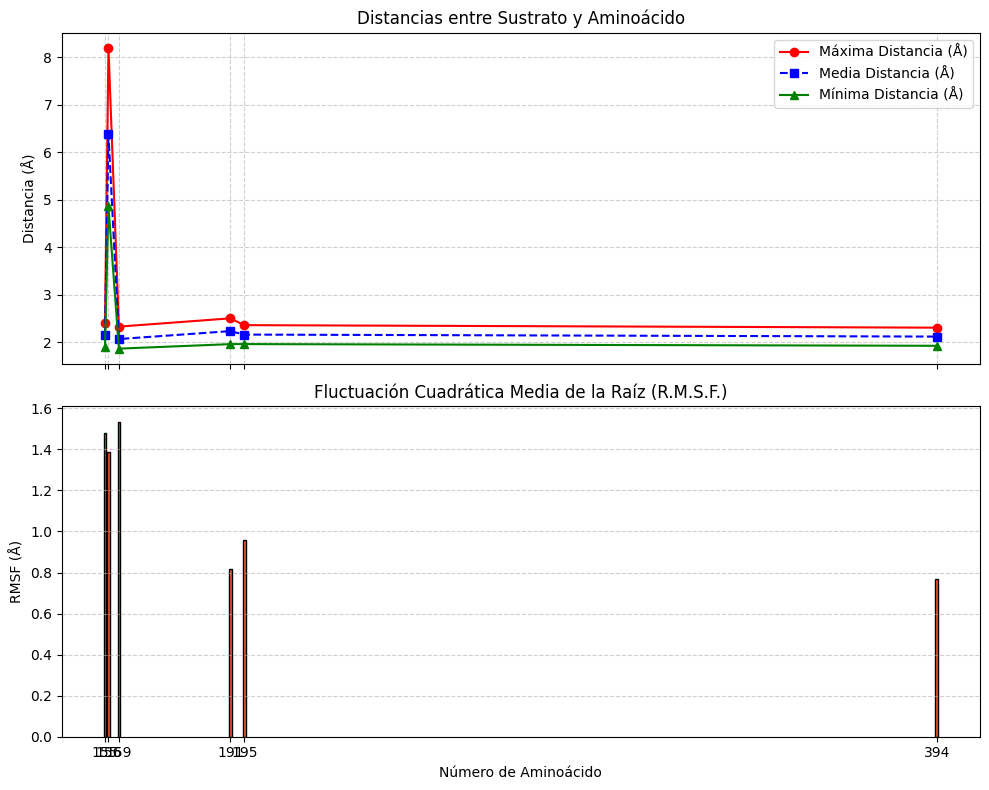

In [35]:
# Convertir la lista a un array de NumPy para facilitar el manejo
data_array = np.array(datos_dinamica, dtype=object)

# Extraer los datos de las columnas relevantes
numeros_aa = data_array[:, 0].astype(int)
distancia_max = data_array[:, 1].astype(float)
distancia_min = data_array[:, 2].astype(float)
distancia_media = data_array[:, 3].astype(float)
rmsf_valores = data_array[:, 4].astype(float)

# --- Configurar los subplots (2 filas, 1 columna) ---
# sharex=True asegura que ambos subplots compartan el mismo eje X (los números de AA)
fig, (ax_lines, ax_bars) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# ----------------------------------------------------
# Subplot Superior (ax_lines): Tres líneas
# ----------------------------------------------------
ax_lines.plot(numeros_aa, distancia_max, marker='o', linestyle='-', color='r', label='Máxima Distancia (Å)')
ax_lines.plot(numeros_aa, distancia_media, marker='s', linestyle='--', color='b', label='Media Distancia (Å)')
ax_lines.plot(numeros_aa, distancia_min, marker='^', linestyle='-', color='g', label='Mínima Distancia (Å)')

ax_lines.set_title('Distancias entre Sustrato y Aminoácido')
ax_lines.set_ylabel('Distancia (Å)')
ax_lines.grid(True, linestyle='--', alpha=0.6)
ax_lines.legend()

# ----------------------------------------------------
# Subplot Inferior (ax_bars): Barras verticales (RMSF)
# ----------------------------------------------------
ax_bars.bar(numeros_aa, rmsf_valores, color='#FF5733', edgecolor='black')

ax_bars.set_title('Fluctuación Cuadrática Media de la Raíz (R.M.S.F.)')
ax_bars.set_xlabel('Número de Aminoácido')
ax_bars.set_ylabel('RMSF (Å)')
ax_bars.grid(axis='y', linestyle='--', alpha=0.6)

# Asegurar que se muestren los números de aminoácidos en el eje X
plt.xticks(numeros_aa)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()


**Autoria**

Autores/as que han participado colectivamente en esta obra:


*   Pau Andrio Balado
*   Brian Jiménez García
*   Melchor Sanchez Martinez
*   Alba Nin Hill
* Xavier Grau-Bové

**Fecha de creación**


*   Ultima modificación: Octubre 2025